<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristopher Urbina H.
- Nombre de alumno 2: Joaquin Zamora O.


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/CrisU8/MDS7202-Primavera2024)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


## 2. Clasificación de pacientes con diabetes (5 puntos)


In [1]:
!pip install xgboost
!pip install shap
!pip install alibi

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from xgboost import plot_importance
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from alibi.explainers import AnchorTabular

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

P2.1

P2.1.1

In [3]:
#Exploración de datos
print(df.shape)

print(df.info())

print(df.describe())

(70692, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke 

In [4]:
df.isna()["Diabetes"]

,Diabetes
0,False
1,False
2,False
3,False
4,False
...,...
70687,False
70688,False
70689,False
70690,False


In [5]:
df.drop(28118, axis=0, inplace=True)

print(df.isna()["Diabetes"])

0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Name: Diabetes, Length: 70691, dtype: bool


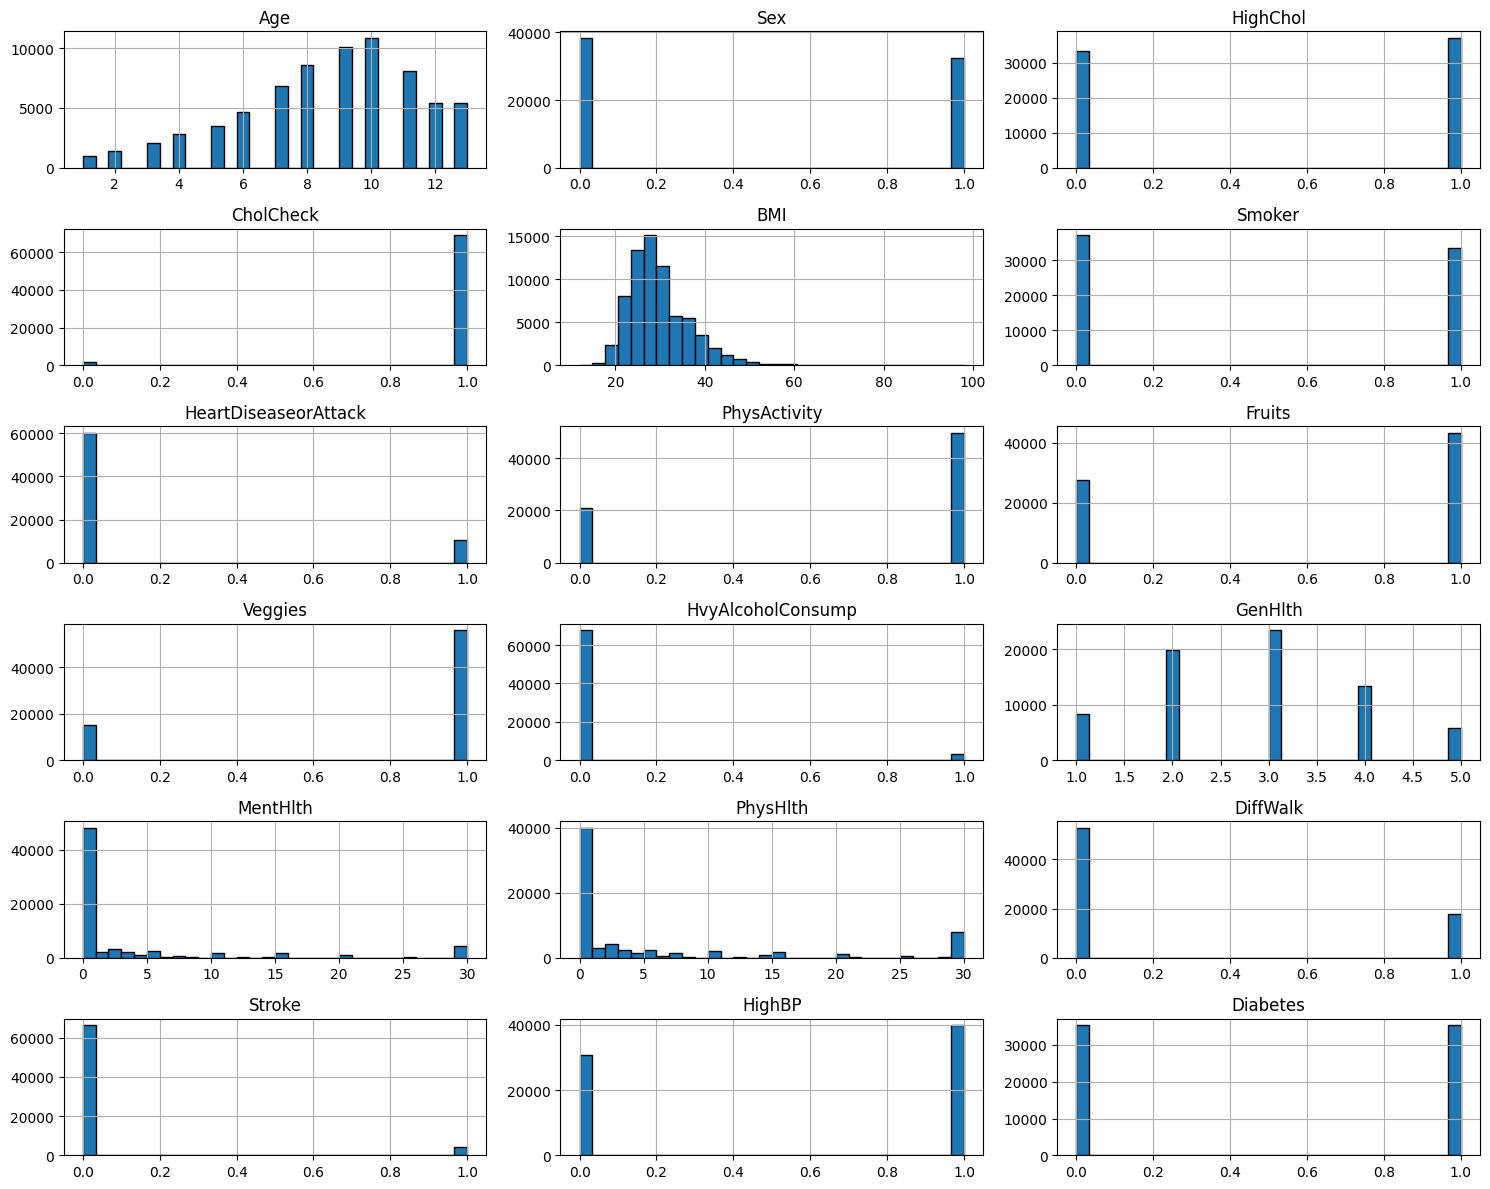

In [6]:
#Distribuciones
df.hist(figsize=(15, 12), bins=30, layout=(6, 3), edgecolor='black')
plt.tight_layout()
plt.show()

Para Age se aplicará MinMaxScaler para mantener una influencia similar con respecto a las demás variables porque el rango de sus valores se encuentra entre 1 y 13, pudiendo perturbar el entrenamiento. Además, no tiene distribución con formal normal.

En el caso de BMI se va aplicar StandardScaler por su comportamiento normal y para transformar su rango que se encuentra entre 12 y 98, dejándolo entre 0 y 1.

En cambio, para la variable GenHlth se le aplica MinMaxScaler como transformación para así reducir su rango, cabe destacar que es categórica. Por motivos similares a las variables MentHlth y PhysHlth también se les va aplicar MinMaxScaler.

P2.1.2

In [7]:
#Se separa el dataset con una proporción de 2/3 para train y 1/3 para test
train_data, test_data = train_test_split(df, test_size= 1/3, random_state=42)

P2.1.3

In [8]:
#Columnas para MinMaxScaler
minmax_cols = ['Age', 'GenHlth', 'MentHlth', 'PhysHlth']
#Columna para StandardScaler
standard_cols = ['BMI']

#Se crea el ColumnTransformer fijando la salida en formato pandas
preprocessor = ColumnTransformer(
    transformers=[
        ('stand', StandardScaler(), standard_cols),
        ('minmax', MinMaxScaler(), minmax_cols),
    ], verbose_feature_names_out=False
).set_output(transform='pandas')

#Printeo para verificar
print(preprocessor)

ColumnTransformer(transformers=[('stand', StandardScaler(), ['BMI']),
                                ('minmax', MinMaxScaler(),
                                 ['Age', 'GenHlth', 'MentHlth', 'PhysHlth'])],
                  verbose_feature_names_out=False)


P2.1.4


In [9]:
#Pipeline con XGBClassifier
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

#Entrenamiento del modelo
pipeline_xgb.fit(train_data, train_data['Diabetes'])

#Predicción sobre el conjunto de test
test_predictions_xgb = pipeline_xgb.predict(test_data)

#Se calcula y muestra el reporte de clasificación
report_xgb = classification_report(test_data['Diabetes'], test_predictions_xgb)
print('Reporte de Clasificación para XGBClassifier:')
print(report_xgb)

Reporte de Clasificación para XGBClassifier:
              precision    recall  f1-score   support

         0.0       0.75      0.68      0.71     11744
         1.0       0.71      0.77      0.74     11820

    accuracy                           0.73     23564
   macro avg       0.73      0.73      0.73     23564
weighted avg       0.73      0.73      0.73     23564



P2.2.1

En el contexto dado es fundamental minimizar los falsos negativos. En base a la clase positiva, el recall es de 0.77 por lo que no se están detectando el 23% de los pacientes con diabetes, lo que es alarmante. Además, la precisión es de 0.71 lo que indica que el 29% de los diagnósticos positivos son incorrectos. Por último, desde una visión general el F1-Score es 0.74 lo cual no es lo suficientemente aceptable para este contexto médico.

P2.2.2

La métrica Accuracy mide la proporción de predicciones correcta respecto al total de predicciones, se suele escoger porque representa una forma general de verificar modelos.

La precision en sí mide que tan preciso es un modelo cuando se predice una clase positiva, es por ello que se define a través de la proporción entre verdaderos positivos con respecto a todos los casos clasificados como positivos.

El recall es semejante a la precision, solo que en vez de realizar tener la cantidad de falsos positivos se emplean los falsos negativos, de esta manera realiza la medida respecto al total de casos reales positivos.


Por último, la métrica F1-Score representa una forma de relacionar la precision y recall, en función de este valor se puede identificar que tan equilibrada están ambas medidas, dicho esto es útil para tener una visión más general del problema médico respecto al diagnóstico positivo considerando falsos positivos y negativos.

P2.2.3

Estas métricas no certifican que el modelo realice una buena selección de características, simplemente muestra que tan bien clasifica. Para medir esto se podrían aplicar técnicas de regularización para escoger las columnas realmente relevantes.

## 3. Importancia de las features con XGBoost (5 puntos)



Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

P3.1

<Figure size 1000x600 with 0 Axes>

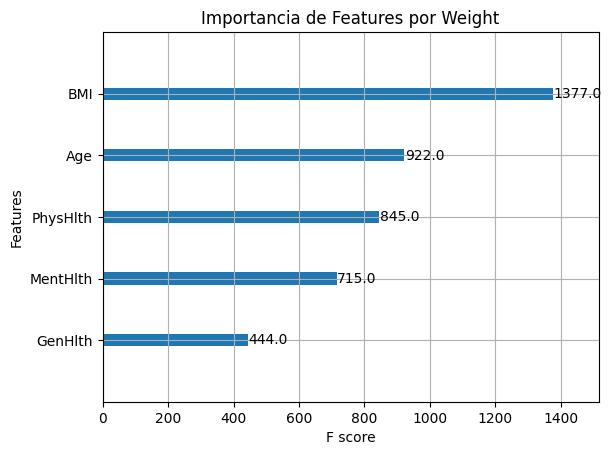

<Figure size 1000x600 with 0 Axes>

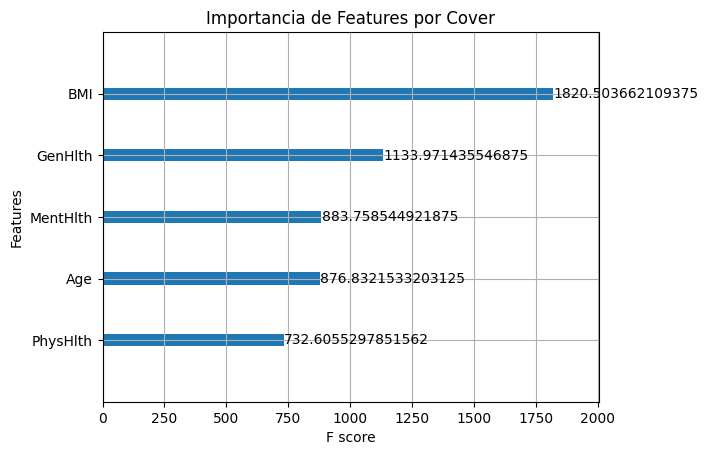

<Figure size 1000x600 with 0 Axes>

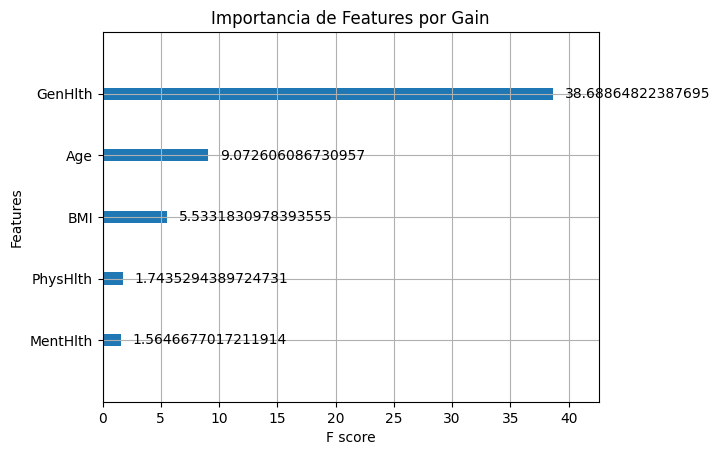

In [10]:
#Modelo XGBClassifier dentro del pipeline
xgb_model = pipeline_xgb.named_steps['classifier']


#Se mide la importancia según 'weight'
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')
plt.title('Importancia de Features por Weight')
plt.show()

#Se emplea la importancia según 'cover'
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='cover')
plt.title('Importancia de Features por Cover')
plt.show()

#Importancia según 'gain'
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='gain')
plt.title('Importancia de Features por Gain')
plt.show()


P3.2

Weight (vinculado con la frecuencia de uso):

La característica BMI tiene la mayor importancia, utilizada 1305 veces para dividir, seguida de Age y PhysHlth. GenHlth tiene la menor frecuencia. Se interpreta como la frecuencia respecto a la cantidad de divisiones que realiza el árbol.
  

Cover (cobertura de las muestras):
BMI también tiene la mayor cobertura con 1937, seguido por GenHlth y MentHlth. PhysHlth tiene la menor cobertura. De esta manera, se muestra que tan influyentes al momento de tomar decisiones basado la cantidad de observaciones que afectan.


Gain (incremento de la precisión):
GenHlth tiene el mayor gain con 37.34, seguido por Age con 9.63. MentHlth tiene el menor gain con 1.63. En este caso, mide la calidad de las divisiones según el aumento en el rendimiento por las divisiones.

Compatibilidad de Resultados:

Los tres métodos proporcionan información de carácter complementario. Según el primer y segundo método, BMI tiene la mayor importancia tanto en weight como en cover, pero no es la que aporta más ganancia en cuanto a las divisiones. GenHlth, por otro lado, tiene el mayor gain, pero su frecuencia de uso y cobertura son relativamente bajas.

Por otro lado, el hecho de que no todos los métodos resulten en la misma clasificacion demuestra que en algunos casos no porque una característica sea la con mayor frecuencia en divisiones, o que sea la que más afecte en cantidad de observaciones significa que es la con mayor calidad para mejorar el modelo.



P3.3

No son suficientes para obtener la interpretabilidad dado que solo entregan importancia desde una visión global del problema, no pudiendo explicar como afectan las características a predicciones en particular. Además, con un modelo de árbol se pueden generar sesgos por el hecho de que existen características con más puntos de división potencial (las que poseen mayor cantidad de valores posibles) sesgando así la importancia.





## 4. Métodos Agnósticos Globales (10 puntos)



Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

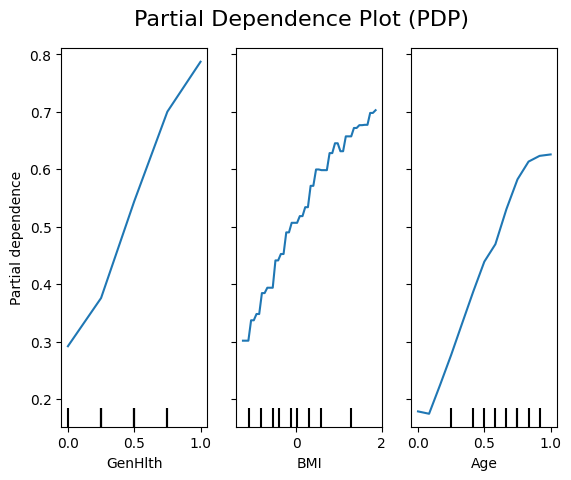

In [11]:
#Se transforma la data
all_features = pipeline_xgb.named_steps['preprocessor'].transform(train_data)
#Se definen las características a plotear
features_to_plot = ['GenHlth', 'BMI', 'Age']

#Se genera el PDP para las características seleccionadas
pdp_display = PartialDependenceDisplay.from_estimator(
    pipeline_xgb.named_steps['classifier'],
    all_features,
    features=features_to_plot,
    grid_resolution=50
)

#Se grafica
pdp_display.figure_.suptitle('Partial Dependence Plot (PDP)', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()


In [12]:
train_data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
354,3.0,0.0,0.0,1.0,24.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
55087,11.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
32737,4.0,0.0,0.0,0.0,30.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0
13293,6.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,15.0,10.0,1.0,0.0,0.0,0.0
48864,9.0,1.0,0.0,1.0,32.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37195,13.0,1.0,1.0,1.0,34.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,0.0,20.0,1.0,0.0,1.0,1.0
6265,9.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
54887,11.0,0.0,0.0,1.0,36.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,7.0,1.0,0.0,0.0,1.0
860,10.0,1.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0


P4.2

In [13]:
# Repetir el proceso de permutación 30 veces y calcular la desviación estándar
X_test = test_data.drop(columns=['Diabetes'])
y_test = test_data['Diabetes']

#Se transforma X_test usando el preprocesador del pipeline
X_test_transformed = pipeline_xgb.named_steps['preprocessor'].transform(X_test)

#Se calcula la importancia de las características usando el modelo y los datos transformados
result = permutation_importance(xgb_model, X_test_transformed, y_test, n_repeats=30, random_state=42, n_jobs=-1)



P4.3

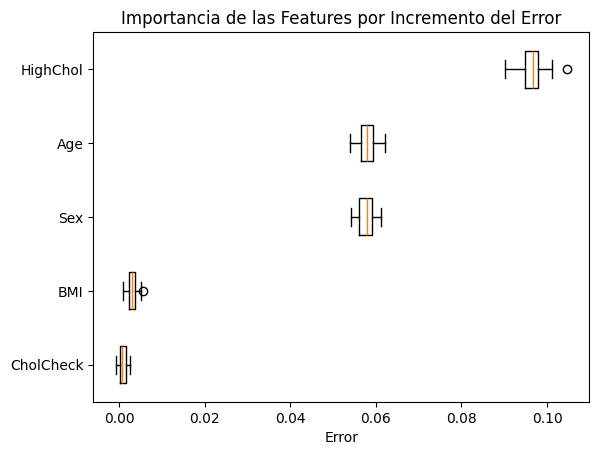

In [14]:
#indices de las características basados en la importancia promedio
perm_sorted_idx = result.importances_mean.argsort()

#Se crea un boxplot de las importancias de las características
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(X_test.columns)[perm_sorted_idx]
)

#Se grafica
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()


P4.4

P4.4.1
La importancia de las características en este caso se mide observando el aumento en el error de predicción del modelo cuando los valores de la feature se permutan de manera aleatoria, vale decir, que si la permutación causa un aumento significativo en el error, muestra que la feature es importante para el modelo. Cabe destacar que la importancia se muestra como el promedio.

P4.4.2

Visualizando el gráfico se puede notar que las 5 feature que tienen mayor impacto son:

HighChol: Tiene el mayor impacto en el error, lo que sugiere que es una característica importante para la predicción de la diabetes, viéndolo desde una perspectiva más real puede tener sentido porque el colesterol alto está asociado con un mayor riesgo de enfermedades relacionadas.

Age: En segundo lugar se muestra que posee sentido el hecho de que la edad es un factor de riesgo, dado que aumentan las posibilidades de padecer diabetes respecto al tiempo.

Sex: A pesar de estar en el tercer lugar no se le puede atribuir un factor determinante respecto al riesgo de padecer diabetes, se puede producir por diferencias biológicas.

BMI: Tiene un impacto menor comparado con las otras features, pero aún así posee relevancia ya que el sobrepeso es un factor de riesgo importante para la diabetes.

CholCheck: Al igual que el caso anterior a pesar de tener una menor importancia en la realidad si se considera una amenaza la característica del colesterol.

P4.4.3

Cambian con respecto al caso anterior porque el método de permutación muestra cómo afectan realmente al rendimiento del modelo algunas características, de esta forma algunas features no seleccionadas previamente se pueden distinguir por el hecho de que tienen que ver con el impacto sobre el error de predicción más que enfoques frecuentistas o de cobertura.

P4.4.4

Ventajas:

Se puede cuantificar el impacto en el error de predicción, lo que proporciona una métrica clara y de interpretabilidad sencilla.


No posee dependencias a modelos en particular, lo que lo hace más flexible respecto a los contextos que se pueden apreciar en la realidad

Como se realizan permutaciones permite tener una visión más certera respecto a las importancias de las característics, ya que no solo se trata de estudiar un solo escenario.


Desventajas:

Puede crear un potencial overfitting por el hecho de que se puede contar con un modelo con una precisión alta, pudiendo dar importancia a algunas features que en realidad no afectan de manera sustancial el error de la predicción.

Es sensible a la correlación, por lo que es necesario analizar estos factores previo a la aplicación del método.



En caso de poseer una mayor cantidad de datos pueden haber problemáticas ligadas al costo computacional al tener que recalcular las predicciones en varias ocasiones.

## 5. Métodos Agnósticos Locales (20 puntos)

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [15]:
!pip install shap

In [16]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

P5.1

In [17]:
import shap

#Se crea un explicador de SHAP para el modelo, notar que esta basado en arboles
explainer = shap.TreeExplainer(xgb_model)

#Se calcua los valores de SHAP para el conjunto de test transformado
shap_values = explainer.shap_values(X_test_transformed)

# Convertir X_test_transformed a un DataFrame si es necesario, con los nombres de las características transformadas
X_test_transformed_df = pd.DataFrame(
    X_test_transformed,
    columns=pipeline_xgb.named_steps['preprocessor'].get_feature_names_out()
)

# Inicializar el soporte para gráficos interactivos
shap.initjs()

# Visualizar los valores de SHAP al (por ejemplo, la primera observación)
shap.force_plot(explainer.expected_value, shap_values[0], X_test_transformed_df.iloc[0])


P5.1.2

Cada número representa la contribución particular de cada característica a la predicción final. Indica cuánto influye cada característica para mover la predicción desde el valor base hacia el resultado final (0.39 en la visualizacion caso).

P5.1.3

Claro que se puede, en el ejemplo si es positiva implica una mayor probabilidad de padecer diabetes y negativa el caso contrario.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

In [18]:
for i in [1, 9, 150]:
    force_plot = shap.force_plot(explainer.expected_value, shap_values[i], X_test_transformed_df.iloc[i])
    shap.save_html(f'force_plot_instance_{i}.html', force_plot)


P5.2.1

En los gráficos las variables de las instancias analizadas, variables como BMI y Age pueden tener contribuciones positivas como negativas, aumentando o disminuyendo la probabilidad de que la persona tenga diabetes dependiendo del color, esto se debe a que las variables dependen del contexto específico ligado al conjunto de características.

P5.2.2

No hay un patrón común en las instancias analizadas, se necesitaría revisar gráficos de más instancias para confirmar patrones.

P5.2.3

No se puede generalizar porque son pocas instancias respecto a todos los datos, es verdad que pueden mostrar potenciales tendencias interesantes pero para afirmar generalización es necesario ser más exhaustivo con más puntos a analizar.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

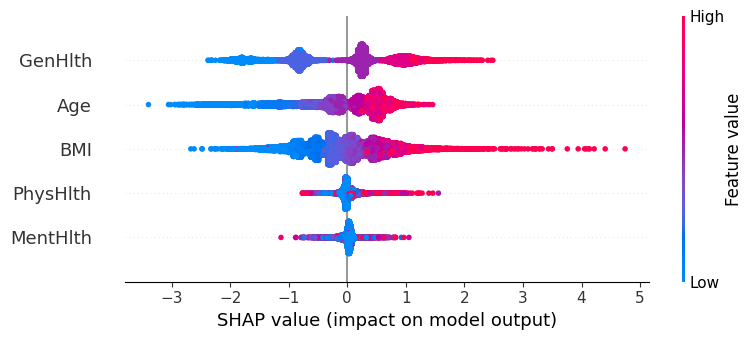

In [19]:
#Resumen de valores SHAP para analizar el aporte global de las feature
shap.summary_plot(shap_values, X_test_transformed_df)


Poseen diferencias ya se puede pensar de que las características tienen una dualidad respecto a disminuir o aumentar la probabilidad de diabetes dependiendo del contexto (en general). Sin embargo, se puede notar de que algunas tienen efectos casi dicotómicos sobre las predicciones como BMI, Age, GenHlth.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

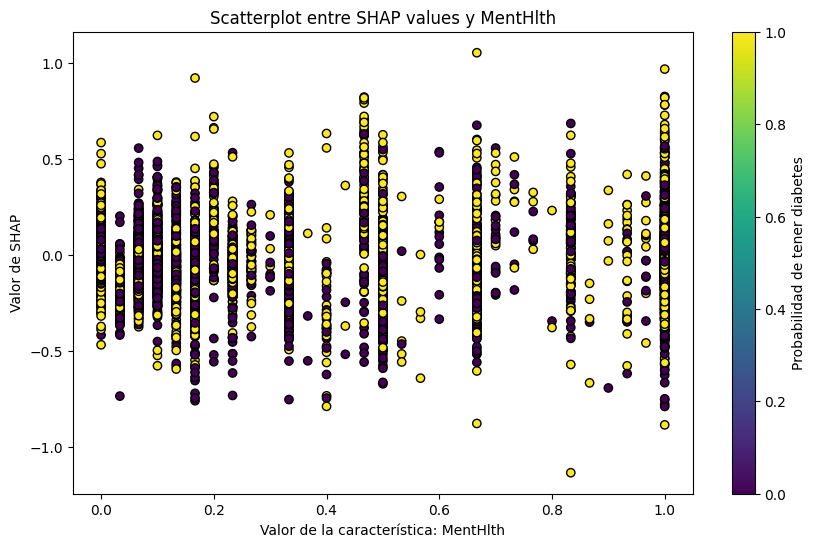

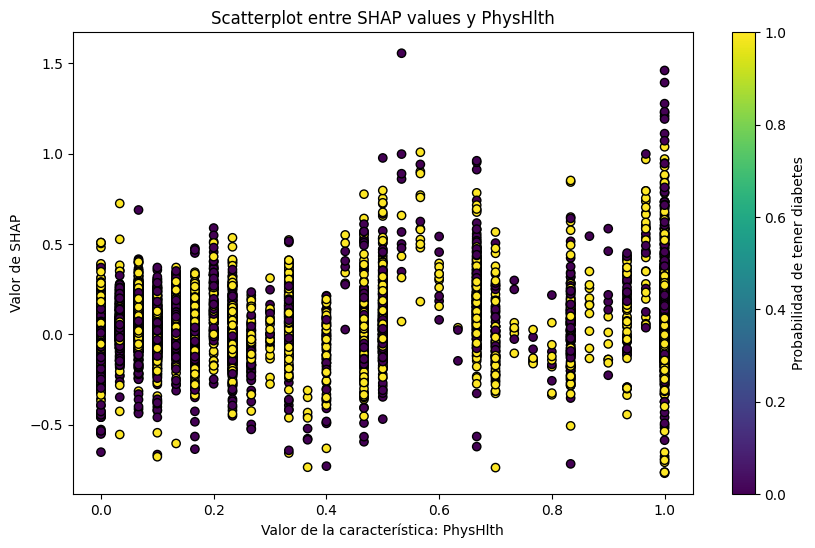

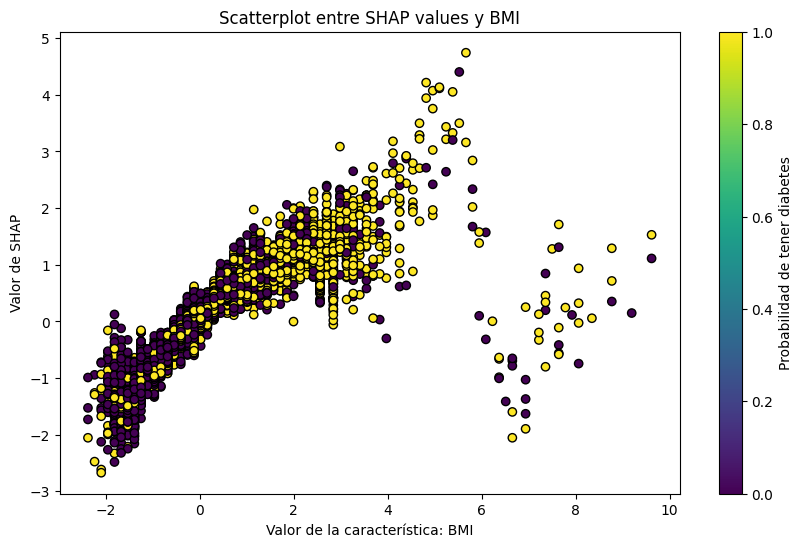

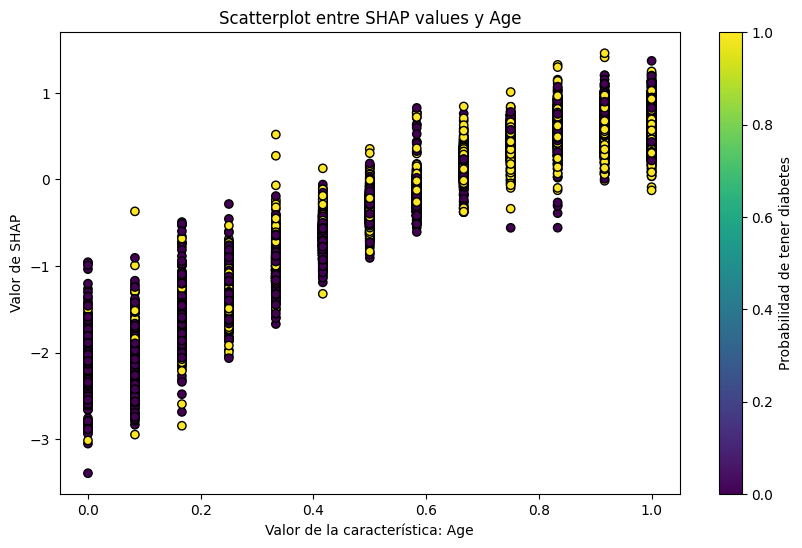

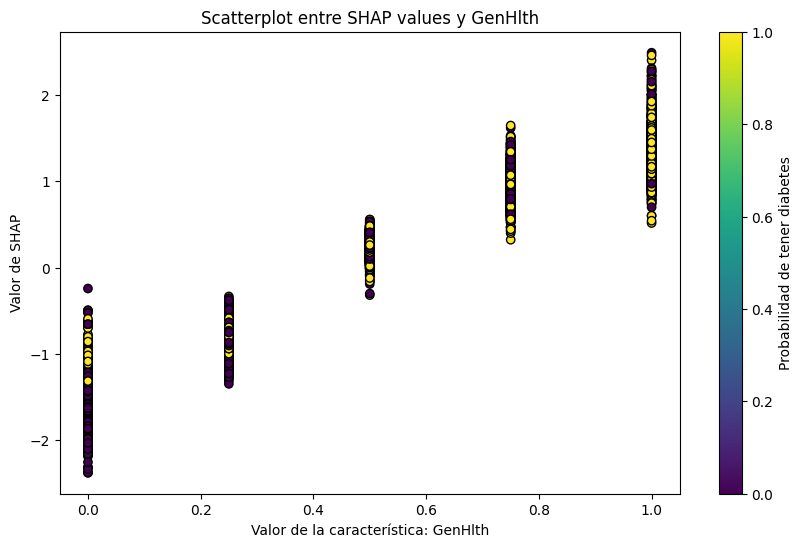

In [20]:
# Inserte código para generar gráficos de feature vs shap value aquí
top_features = X_test_transformed_df.columns[np.argsort(np.abs(shap_values).mean(axis=0))[-5:]]

#Se crea un scatterplot por cada una de las 5 características principales
for feature in top_features:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_transformed_df[feature], shap_values[:, list(X_test_transformed_df.columns).index(feature)],
                c=y_test, cmap='viridis', edgecolor='k')
    plt.colorbar(label='Probabilidad de tener diabetes')
    plt.xlabel(f'Valor de la característica: {feature}')
    plt.ylabel('Valor de SHAP')
    plt.title(f'Scatterplot entre SHAP values y {feature}')
    plt.show()

Respecto al primer gráfico se puede apreciar que posee alta dispersión en cuanto a los valores siendo equilibrado respecto al 0, por lo que es probable que no sea una buena feature para el caso "MentHlth". Respecto a la feature de PhysHlth también se muestra con alta dispersión pero con la particularidad de aumentar su variación cuando el valor de feature se acerca a 1. Tercero, BMI si se nota que a medida que aumenta también lo hace la probabilidad de padecer diabetes. En cuarto y quinto lugar, a medida que va aumentando la edad o GenHlth van aumentando los valores shap, desde los negativos hasta los positivos, por lo que si contribuyen a poseer un mayor factor de riesgo de padecer diabetes.

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

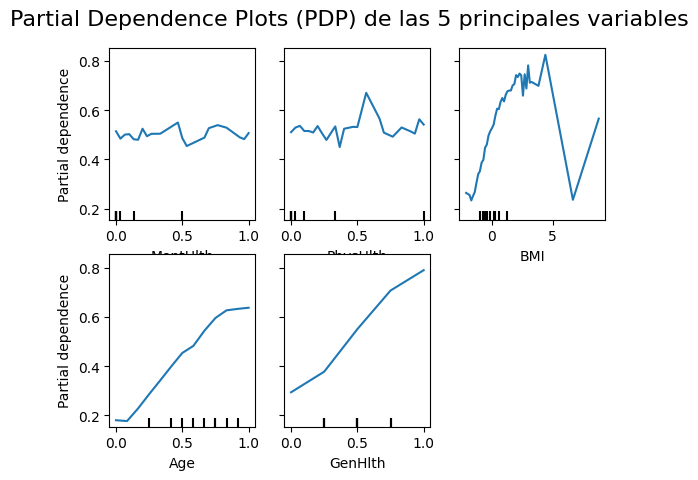

In [21]:
# Inserte código para generar gráficos PDP aquí
# Submuestra de 1000 observaciones de X_test_transformed_df
subsample = X_test_transformed_df.sample(n=1000, random_state=42)

# Graficar PDP para las 5 características principales
PartialDependenceDisplay.from_estimator(
    pipeline_xgb.named_steps['classifier'],
    subsample,
    features=top_features,  # Utilizar las 5 características de mayor impacto
    grid_resolution=50,  # Resolución del gráfico
    n_jobs=-1
)
plt.suptitle('Partial Dependence Plots (PDP) de las 5 principales variables', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

Primero que todo, se confirma lo de la parte anterior. Age y GenHlth a medida que aumentan también generan un aumento en la probabilidad de padecer diabetes. BMI es diferente ya que posee un peak hasta decaer (como una correción) para luego retomar la tendencia inicial, lo cual da a comprender la importancia de los contextos. Por último MentHlth y PhysHlth no presentan mucha variabilidad e influencia en el estudio.

## 6. Sistema de Reglas! (10 punto)



Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [22]:
#Se Extrae el preprocesador y el modelo del pipeline
preprocessor = pipeline_xgb.named_steps['preprocessor']
classifier = pipeline_xgb.named_steps['classifier']

#Nuevamente separación de features
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

#Se aplica preprocessor
X_preprocessed = preprocessor.transform(X)
X_preprocessed = pd.DataFrame(X_preprocessed, columns=preprocessor.get_feature_names_out())


In [23]:
observations = X_preprocessed.loc[[1000, 3001, 5751]]


In [24]:
#Se crea la función de predicción
predict_fn = lambda x: classifier.predict(x)

#Instanciar el explainer
explainer = AnchorTabular(predict_fn, feature_names=preprocessor.get_feature_names_out())

#Se ajusta el explainer al conjunto de entrenamiento preprocesado
explainer.fit(X_preprocessed.values)

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': None, 'disc_perc': (25, 50, 75)},
  'version': '0.9.6'}
)

In [25]:
for idx in [1000, 3001, 5751]:
    instance = X_preprocessed.iloc[idx].values.reshape(1, -1)
    explanation = explainer.explain(instance, threshold=0.95)
    print(f"Observación {idx}:")
    print('Regla:', ' AND '.join(explanation.anchor))
    print(f"Precisión de la regla: {explanation.precision:.2f}")
    print(f"Cobertura de la regla: {explanation.coverage:.2f}")
    print(f"Predicción del modelo: {classifier.predict(instance)[0]}")

Observación 1000:
Regla: GenHlth <= 0.25 AND BMI <= -0.69
Precisión de la regla: 0.98
Cobertura de la regla: 0.15
Predicción del modelo: 0
Observación 3001:
Regla: GenHlth > 0.50 AND Age > 0.50
Precisión de la regla: 0.96
Cobertura de la regla: 0.21
Predicción del modelo: 1
Observación 5751:
Regla: GenHlth <= 0.25 AND BMI <= -0.69
Precisión de la regla: 0.98
Cobertura de la regla: 0.15
Predicción del modelo: 0


Para la observación 1000 y la 5751 se indica que para ambas features la predicción del modelo es que no se clasifican pacientes con diabetes, lo cual tiene sentido, ya que se puede alinear con un estado de salud normal con un indice de grasa corporal bajo, teniendo un efecto conjunto de menor factor de riesgo. Por otro lado, la observación 3001 indica que a pesar de tener una alta edad al tener buena salud se pueden contrarrestar la probabilidad de tener diabetes.

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

En este caso, considerando que se trata de un contexto médico en el cual se tiene que clasificar el padecimiento de diabetes, consideramos que los métodos locales son más útiles, principalmente porque permiten ver cada caso a detalle. Ayudando a personalizar las decisiones para cada uno de los pacientes. Es probable que en otro contexto sea mejor aplicar un método global para comprender que es lo que está sucediendo desde una visión general, sin embargo, es fundamental tener en noción que el visualizar cada caso de manera particular es más beneficioso en términos prácticos.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>